In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yahooFinance
import datetime
import math


plt.style.use("seaborn")
plt.rcParams['figure.figsize']=[18,10]

In [2]:
cars=pd.read_csv("Camry_242_Spring2023.csv")

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthNumeric   174 non-null    int64  
 1   MonthFactor    174 non-null    object 
 2   Year           174 non-null    int64  
 3   CamrySales     174 non-null    int64  
 4   Unemployment   174 non-null    float64
 5   CamryQueries   174 non-null    int64  
 6   CPIAll         174 non-null    float64
 7   CPIEnergy      174 non-null    float64
 8   MilesTraveled  174 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 12.4+ KB


In [4]:
cars.describe()

,MonthNumeric,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled
count,174.000000,174.000000,174.000000,174.000000,174.00000,174.000000,174.000000,174.000000
mean,6.396552,2014.758621,30454.114943,6.386782,63.87931,239.645207,223.092201,256127.747126
std,3.460460,4.202849,7016.683345,2.244968,16.87740,18.785493,26.952453,13636.310187
min,1.000000,2008.000000,8768.000000,3.500000,35.00000,211.398000,176.401000,167174.000000
25%,3.000000,2011.000000,26309.500000,4.425000,51.00000,226.228750,203.595000,247127.500000
50%,6.000000,2015.000000,30138.500000,5.900000,61.00000,237.445000,218.740000,252785.500000
75%,9.000000,2018.000000,34528.250000,8.200000,80.00000,252.530750,244.512000,267781.750000
max,12.000000,2022.000000,54396.000000,14.800000,100.00000,295.328000,332.087000,285452.000000


In [5]:
cars.head()

,MonthNumeric,MonthFactor,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled
0,1,January,2008,31601,5.0,40,212.174,226.775,253376
1,2,February,2008,34914,4.9,41,212.687,229.731,250551
2,3,March,2008,40487,5.1,51,213.448,233.349,248981
3,4,April,2008,40016,5.0,47,213.942,234.778,249101
4,5,May,2008,51291,5.4,54,215.208,243.924,248415


In [6]:
train_cars=cars[cars["Year"]<=2018]
test_a=cars[cars["Year"]>=2019]
test_a=test_a[test_a['Year']<=2020]
test_b=cars[cars["Year"]>=2021]
test_a=test_a[["CamrySales", "Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll", 'MilesTraveled']]
test_b=test_b[["CamrySales", "Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll", 'MilesTraveled']]

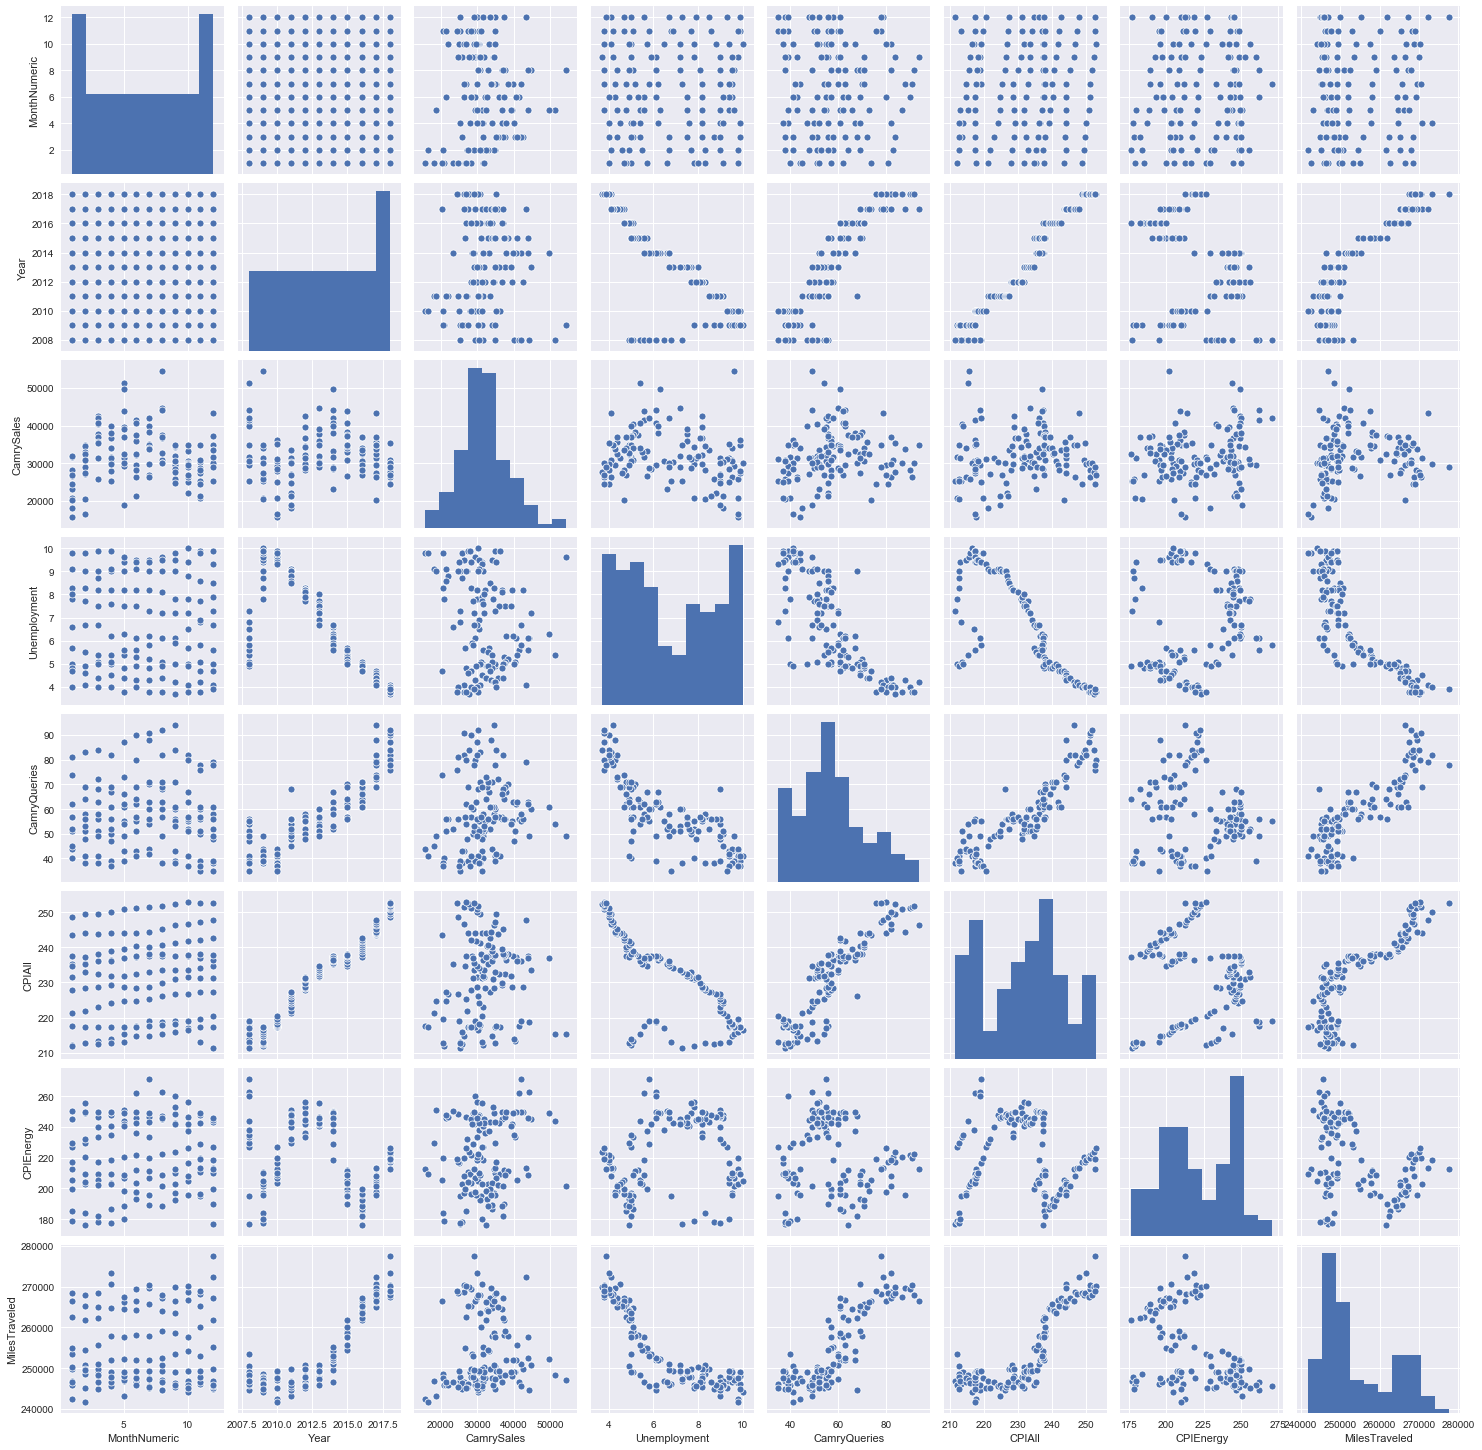

In [7]:
sns.pairplot(train_cars, kind="scatter")

In [8]:
X_train=train_cars[["Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll", 'MilesTraveled']]
Y_train=train_cars[["CamrySales"]]


In [9]:
intercept=[1]*len(X_train)
X_train["Intercept"]=intercept

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
import statsmodels.api as sm

In [11]:
model=sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     4.722
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           0.000549
Time:                        15:29:37   Log-Likelihood:                -1339.1
No. Observations:                 132   AIC:                             2690.
Df Residuals:                     126   BIC:                             2707.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Unemployment  -1703.2073    559.555     -3.044

In [12]:
def OSRT(amodel, df_train, df_test, label):
    y_pred=amodel.predict(df_test)
    y_test=df_test[label]
    SSE=np.sum((y_pred-y_test)**2)
    baseline=np.mean(df_train[label])
    SST=np.sum((y_pred-baseline)**2)
    return(1-SSE/SST)

In [13]:
OSRT(model, train_cars, test_a, "CamrySales")

-3.8334167506981487e-07

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)


cols=["Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll", 'MilesTraveled']
VIF(train_cars, cols)

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Unemployment      4.140307
CamryQueries      6.955649
CPIEnergy         2.467946
CPIAll            7.425610
MilesTraveled    12.610832
dtype: float64

Let's delete the Miles Traveled column then. 

In [15]:
X_train=train_cars[["Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll"]]
intercept=[1]*len(X_train)
X_train["Intercept"]=intercept
X_train.shape

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(132, 5)

In [16]:
model2=sm.OLS(Y_train, X_train).fit()

In [17]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.852
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           0.000235
Time:                        15:29:38   Log-Likelihood:                -1339.3
No. Observations:                 132   AIC:                             2689.
Df Residuals:                     127   BIC:                             2703.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Unemployment -1536.4666    475.862     -3.229   

In [18]:
test_a=test_a[["CamrySales","Unemployment", "CamryQueries", "CPIEnergy",	"CPIAll"]]

In [19]:
OSRT(model2, train_cars, df_test=test_a, label="CamrySales")

0.0002961167252732988

In [20]:
cols=["Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll"]
VIF(train_cars, cols)

Unemployment    3.010391
CamryQueries    6.217623
CPIEnergy       1.063965
CPIAll          5.642441
dtype: float64

We are going to remove the CamryQueries feature.

In [21]:
X_train_3=train_cars[["Unemployment",  "CPIEnergy" ,"CPIAll"]]
intercept=[1]*len(X_train_3)
X_train_3["Intercept"]=intercept
X_train_3.shape

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(132, 4)

In [22]:
model3=sm.OLS(Y_train, X_train_3).fit()
preds= model3.predict(X_train_3)

In [23]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7.394
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           0.000131
Time:                        15:29:38   Log-Likelihood:                -1339.9
No. Observations:                 132   AIC:                             2688.
Df Residuals:                     128   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Unemployment -1725.5488    443.570     -3.890   

In [24]:
test_a=test_a[["CamrySales","Unemployment", "CPIEnergy",	"CPIAll"]]

In [25]:
OSRT(model3, train_cars, df_test=test_a, label="CamrySales")

0.0002486629245642691

# Answering the question of the first part

- What is the linear regression equation produced by your model, and how should one interpret the coefficients for the independent variables? Consider interpretability issues when writing down the equation (e.g., do not just copy and paste the output from Python). How did you select the variables to include in your linear regression model? Do the signs of the model’s coefficients make sense? Are you reasonably sure that the signs are correct? How well does the model predict training set observations? Can you justify the model’s performance on the training data with a quantifiable metric?}



The linear equation produced is: 

$$\hat Y=-1725.54883X_1+ 78.6733X_2  -168.8642X_3 + 65160$$

where $X_1$,  $X_2$,  $X_3$ correspond respectively to $\textit{Unemployment}$, $\textit{CPIEnergy}$ and $\textit{CPIAll}$.

We removed the other variables looking at the value of the VIF: we removed the parameters that had a VIF larger than 5. We also looked at the p-value in the model's summary and the probabilities that 0 belongs to the interval where the p-value belongs. 

The intercept show that if the unemployment, the CPIEnergy and CPIAll where equal to 0, the price would be negative, which is pretty unlikely.
The Unemployment seems to contribute more than the other coefficients to the regression. 

The sign of Unemployment's coefficient is negative. This means that the more there is Unemployment, the cheaper the car is, which is logic with the rule of offer and demand. 

The sign of the CPIEnergy's coefficient is positive. This means that the higher the CPI is in the energy sector, the more expensive the car is, which is logic given the correlation between those two sectors.

The sign of the intercept is also positive which also makes sense: in a world where 0 constraint, where everyone works and has money, the price of a car can be extremeley high.

The sign of the CPIAll is negative: the interpretation is very similar to the one of unemployment. If people are already paying a lot for other things, they are not willing to pay a high price for a car.


The model is not really accurate since the Adjusted R-Squared is not very high.

# Adding seasonality

In [26]:
X_train_bis=train_cars[["MonthNumeric", "Unemployment", "CamryQueries", "CPIEnergy" ,"CPIAll", 'MilesTraveled']]
Y_train=train_cars[["CamrySales"]]
intercept=[1]*len(X_train_bis)
X_train_bis["Intercept"]=intercept

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
model4=sm.OLS(Y_train, X_train_bis).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     4.023
Date:                Sat, 04 Feb 2023   Prob (F-statistic):            0.00102
Time:                        15:29:38   Log-Likelihood:                -1338.8
No. Observations:                 132   AIC:                             2692.
Df Residuals:                     125   BIC:                             2712.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MonthNumeric    126.4399    162.690      0.777

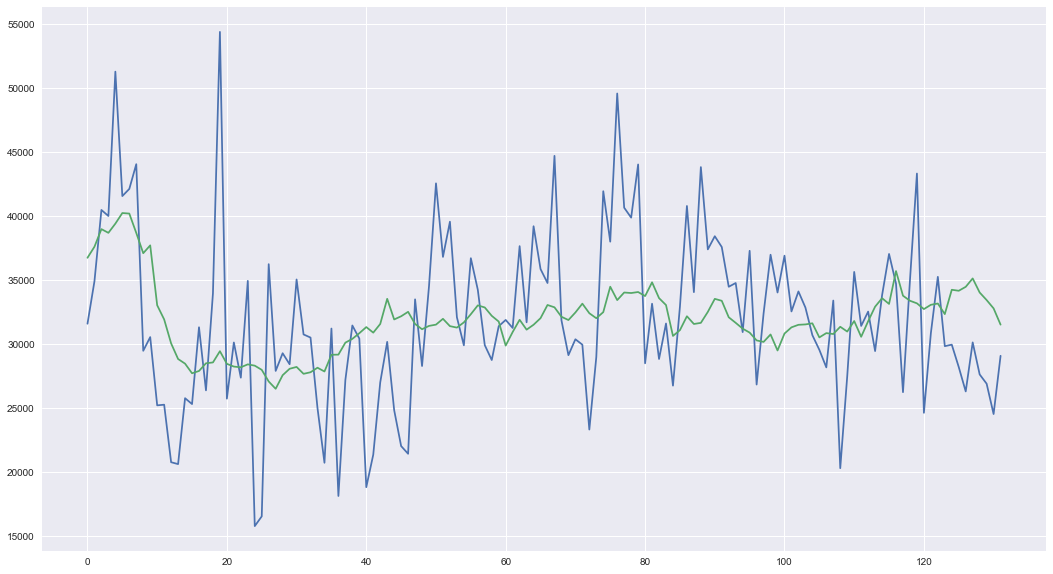

In [28]:
plt.figure()
month=range(len(X_train_bis))
plt.plot(month, Y_train)
plt.plot(month, model4.predict(X_train_bis))
plt.show()

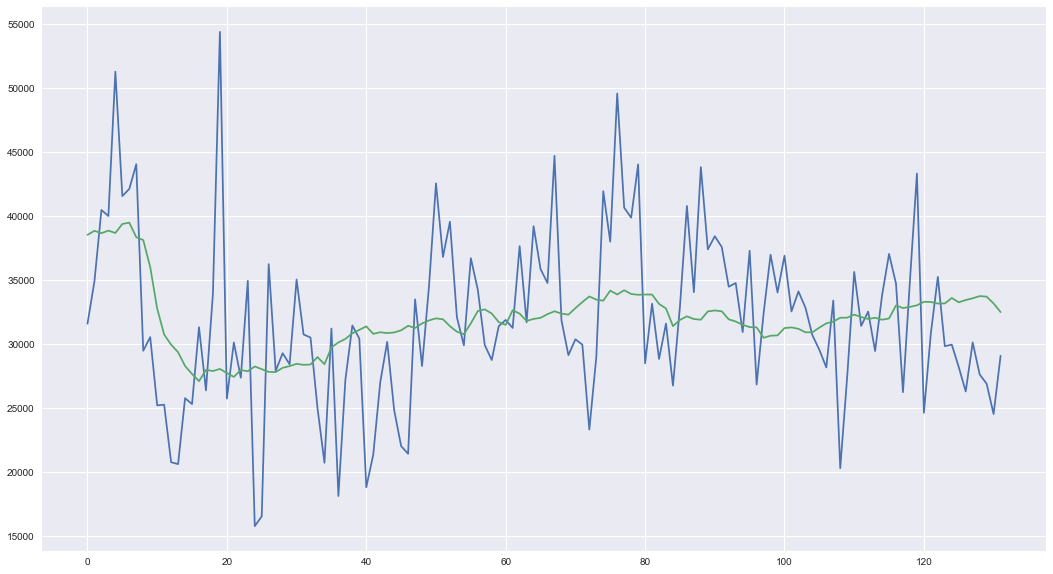

In [29]:
plt.figure()
month=range(len(X_train))
plt.plot(month, Y_train)
plt.plot(month, preds)
plt.show()

# Answering the questions of the second part

- Describe your new model. What is the regression equation? (Do not simply copy and paste output from Python.) How should one interpret the coefficients of each of the MonthFactor dummy variables?

The new model is: 

$$\hat Y=-1729.6736X_1+ 135.2037X_2  + 59.8910X_3 - 238.0558X_4 + 0.1323X_5 + 126.4399X_6110300$$

where $X_1$,  $X_2$,  $X_3$ , $X_4$,  $X_5$,  $X_6$ correspond respectively to $\textit{Unemployment}$, $\textit{CamQueries}$ and $\textit{CPIEnergy}$, $\textit{CPIAll}$, $\textit{MonthFactor}$.

We see that the month has an effect on the regression model with a high coefficient but it's p-value is pretty high. 


- What is the training set R2 for the new model? Which variables are significant?

The new R2 is 0.162 with is already better than what we had before. The significant variables are the same ones than before + the month factor.

- Do you think adding the independent variable MonthFactor improves the quality of the
model? Why or why not?

I think even is the p-value is pretty value, the R2 is way better with this new variable. However we can sense that used in this way 

- Can you think of a different way that you might use the given data to model seasonality?
Do you think your new way would improve on the best model you have constructed so
far? (By the way, later in the course we will have a lecture dedicated to basic time series
modeling, and we will explore a number of ways to construct models using datasets with
an associated time component.)

I think we should add a periodicity in some sort of way, so I think we should have one specific parameter for each month or put the month number in a periodic function. That way would work better than just multiplying the month by a single and unique value. 

## Removing variables

I will select the same variable because I believe if they were not meaningful before, adding a single new temporal feature will not change anything. 

In [30]:
X_train=train_cars[["MonthNumeric", "Unemployment",  "CPIEnergy" ,"CPIAll"]]
Y_train=train_cars[["CamrySales"]]
intercept=[1]*len(X_train)
X_train["Intercept"]=intercept

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
model5=sm.OLS(Y_train, X_train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     5.604
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           0.000347
Time:                        15:29:39   Log-Likelihood:                -1339.7
No. Observations:                 132   AIC:                             2689.
Df Residuals:                     127   BIC:                             2704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MonthNumeric    94.4769    160.731      0.588   

The R2 is lower than before but we removed two parameters which could explain it. However, the Adj R2 is higher than before. So the model has indeed improved on the training set. 

In [32]:
train_cars=cars[cars["Year"]<=2018]
test_a=cars[cars["Year"]>=2019]
test_a=test_a[test_a['Year']<=2020]

test_a=test_a[test_a['Year']<=2020]
test_b=cars[cars["Year"]>=2021]

test_a=test_a[["MonthNumeric", "CamrySales","Unemployment", "CPIEnergy","CPIAll"]]
test_b=test_b[["MonthNumeric", "CamrySales","Unemployment", "CPIEnergy","CPIAll"]]

a=OSRT(model5, train_cars, df_test=test_a, label="CamrySales")
b=OSRT(model5, train_cars, df_test=test_b, label="CamrySales")
print("test a :\n", a, "\n test b :\n", b, "\n difference: \n", abs(a-b))

test a :
 0.0002451855412161086 
 test b :
 0.0002993125377852568 
 difference: 
 5.412699656914821e-05


I am going to add one feature for each month

In [33]:
name_month=list(train_cars["MonthFactor"][0:12])
name_month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'Septeber',
 'October',
 'November',
 'Decemeber']

In [34]:
train_cars["MonthNumeric"][0]

1

In [35]:
seas_train=train_cars

for mon in range(0, 12):
    month=np.zeros(132)
    for element in range(132):
        if train_cars["MonthNumeric"][element]==mon:
            month[element]=1
    seas_train[name_month[mon]]=month
    


/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
seas_train["July"].describe()

count    132.000000
mean       0.083333
std        0.277438
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: July, dtype: float64

In [37]:
seas_train.head(10)

,MonthNumeric,MonthFactor,Year,CamrySales,Unemployment,CamryQueries,CPIAll,CPIEnergy,MilesTraveled,January,...,March,April,May,June,July,August,Septeber,October,November,Decemeber
0,1,January,2008,31601,5.0,40,212.174,226.775,253376,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,February,2008,34914,4.9,41,212.687,229.731,250551,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,March,2008,40487,5.1,51,213.448,233.349,248981,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,April,2008,40016,5.0,47,213.942,234.778,249101,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,May,2008,51291,5.4,54,215.208,243.924,248415,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,June,2008,41572,5.6,56,217.463,262.081,246701,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,7,July,2008,42131,5.8,55,219.016,271.149,245645,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8,August,2008,44064,6.1,49,218.690,262.566,244681,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9,Septeber,2008,29486,6.1,39,218.877,260.125,245948,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,October,2008,30556,6.5,55,216.995,238.065,246795,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
seas_X_train=seas_train[["MonthNumeric", "Unemployment",  "CPIEnergy" ,"CPIAll", 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'Septeber',
 'October',
 'November',
 'Decemeber']]
seas_Y_train=seas_train[["CamrySales"]]
intercept=[1]*len(seas_X_train)
seas_X_train["Intercept"]=intercept

model6=sm.OLS(seas_Y_train, seas_X_train).fit()
print(model6.summary())

/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     8.380
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           3.12e-12
Time:                        15:29:39   Log-Likelihood:                -1304.6
No. Observations:                 132   AIC:                             2639.
Df Residuals:                     117   BIC:                             2682.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MonthNumeric  1459.1186    355.088      4.109   

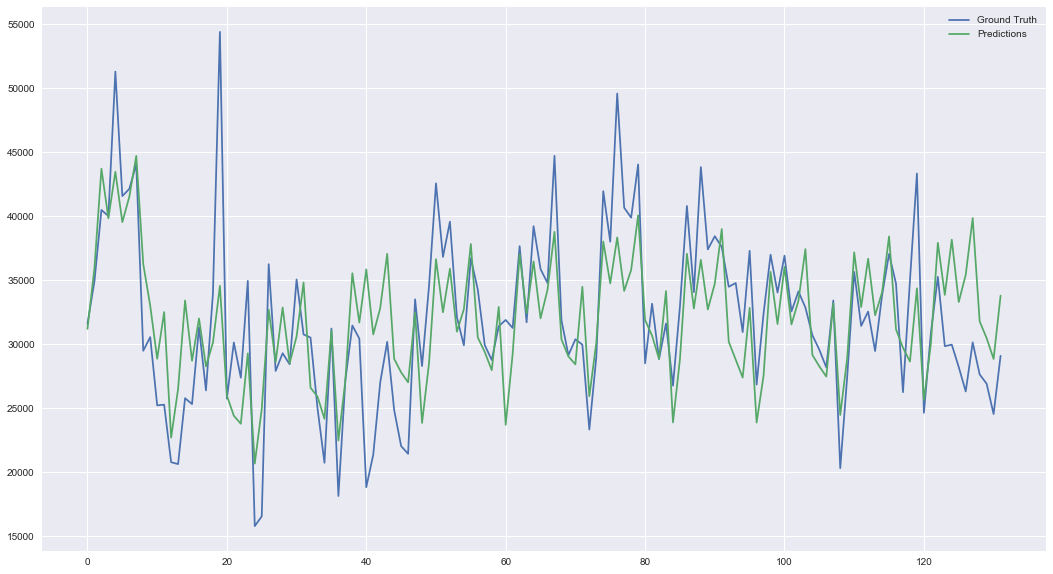

In [40]:
seas_preds= model6.predict(seas_X_train)

plt.figure()
month=range(len(seas_X_train))
plt.plot(month, seas_Y_train, label="Ground Truth")
plt.plot(month, seas_preds, label="Predictions")
plt.legend()
plt.show()

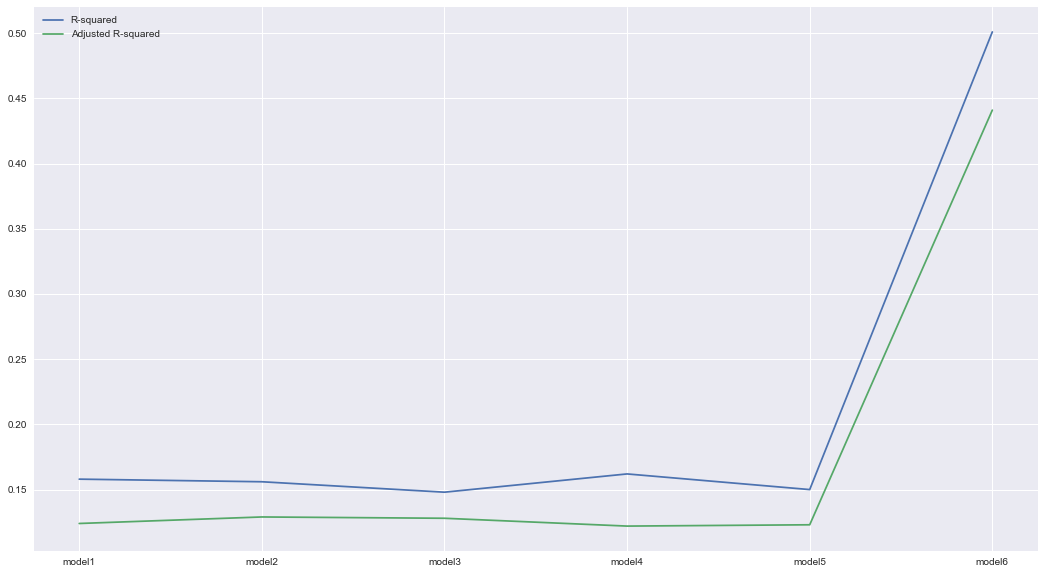

In [42]:
models=["model" + str(k) for k in range(1,7)]
r2=[0.158, 0.156, 0.148, 0.162, 0.150, 0.501]
adj_r2=[0.124, 0.129, 0.128, 0.122, 0.123, 0.441]

plt.figure()
plt.plot(models, r2, label="R-squared")
plt.plot(models, adj_r2, label="Adjusted R-squared")
plt.legend()
plt.show()

## Adding Toyota's stock prices to the regression model

I decided to use yahoo-finance library to add stock prices that are an indicator of the health of the company and how trendy it is which is an indicator for its sales. 

In [67]:
toyota_data=yahooFinance.Ticker("TM")


In [75]:
stocks=[]

for year in range(2009, 2020):
    for month in range(1,12):
        startDate = datetime.datetime(year, month, 1)
        endDate=datetime.datetime(year, month+1, 1)
        close=toyota_data.history(start=startDate,end=endDate)["Close"]
        stocks.append(close.mean())


TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted
TM: No data found for this date range, symbol may be delisted


In [86]:
#ran it one time and removed all the isolated NaNs by taking the average

for stock_nb in range(len(stocks)):
    if math.isnan(stocks[stock_nb]):
        print('NaN found at:', stock_nb)
        stocks[stock_nb]=0.5*(stocks[stock_nb-1]+stocks[stock_nb+1])
        print("Cobverted to :", stocks[stock_nb])

#As you can see in the print, some other values remain, I am going to treat that manually unfortunately


NaN found at: 39
Cobverted to : nan
NaN found at: 40
Cobverted to : nan
NaN found at: 47
Cobverted to : nan
NaN found at: 48
Cobverted to : nan
NaN found at: 49
Cobverted to : nan
NaN found at: 50
Cobverted to : nan


In [87]:
stocks[39]=stocks[38]
stocks[40]=stocks[41]
stocks[47]=stocks[48]=stocks[46]
stocks[49]=stocks[50]=stocks[51]

In [89]:
len(stocks)

121

I still miss the data from 2008 that was not available through yfinance. I am going to add it manually as well. 

In [91]:
initial_stocks=[108.32, 108.55, 100.89, 101.5, 102.05, 94, 86.05, 89.59, 85.8, 76.09, 63.1]
final_stocks=initial_stocks + stocks
len(final_stocks)

132

In [97]:
final_train=seas_train
final_train["Stock Prices"]=final_stocks

final_Y_train=final_train[["CamrySales"]]


final_train=final_train[["MonthNumeric", "Unemployment",  "CPIEnergy" ,"CPIAll", 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'Septeber',
 'October',
 'November',
 'Decemeber', 'Stock Prices']]

intercept=[1]*len(final_train)
final_train["Intercept"]=intercept




/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ghitaalami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [99]:
model7=sm.OLS(final_Y_train, final_train).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:             CamrySales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     9.064
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.34e-13
Time:                        20:03:33   Log-Likelihood:                -1299.2
No. Observations:                 132   AIC:                             2630.
Df Residuals:                     116   BIC:                             2677.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MonthNumeric  1634.3346    346.974      4.710   

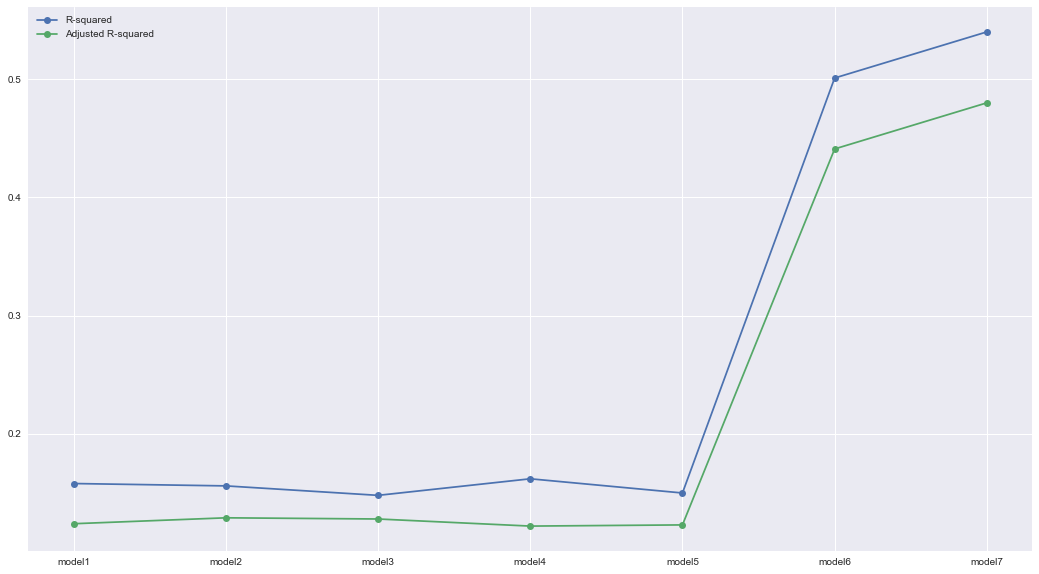

In [104]:
models=["model" + str(k) for k in range(1,8)]
r2=[0.158, 0.156, 0.148, 0.162, 0.150, 0.501, 0.540]
adj_r2=[0.124, 0.129, 0.128, 0.122, 0.123, 0.441, 0.480]

plt.figure()
plt.plot(models, r2, label="R-squared", marker='o')
plt.plot(models, adj_r2, label="Adjusted R-squared", marker='o')
plt.legend()
plt.show()

It seems like the model slightly improved on the training set with the last model. Given the p-value given and the interval of confidence, the Stock prices don't seem to be a useless parameter. However, the biggest improvement to the model was adding the seasonality by a one-hot encoding of  the months in the model. 
This model can probably be further improved, I for example think that only a subset of the months are necessary for the predictions, and that there are some correlations between the different months. We could also look at other financial and social indicators, such as the sales of competitiors or the price of oil.